In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('data_num.csv', delimiter=",")

In [3]:
data = data.drop(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName'], axis=1)

In [4]:
data = data.drop(['RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel'], axis=1)

In [5]:
data = data.drop(['Q3_5_TEXT', 'Q4_6_TEXT', 'Q25_Last Click', 'Q25_Page Submit', 'Q25_Click Count'], axis=1)

In [6]:
data = data.rename(columns={'Q1':'participant_number', 'Q2':'age', 'Q3':'gender', 'Q4':'ethnicity', 'Q5':'political_orientation', 'Q5_4_TEXT':'political_orientation_text', 'Q6':'achieved_education', 'Q6_8_TEXT':'achieved_education_text', 'Q23_1':'bothered_pre', 'Q23_2':'uneasy_pre', 'Q23_3':'uncomfortable_pre', 'Q21':'video', 'Q27':'C_time_alone', 'Q25':'C_academic_performance', 'Q8':'T_time_alone', 'Q24':'T_academic_performance', 'Q9':'value_activation', 'Q13_1':'bothered_post', 'Q13_2':'uneasy_post', 'Q13_3':'uncomfortable_post', 'Q17':'sandwich', 'Q18':'diet', 'Q18_7_TEXT':'diet_text', 'Q19':'reason_for_choice', 'Q20':'labels_attention', 'Q22':'feeling_observed', 'Q21.1':'did_value_activation_affect_choice' })

In [7]:
test = data.drop(data.index[data.participant_number <= 70])
control = data.drop(data.index[data.participant_number > 70])
female = data.drop(data.index[data.gender != 2])
vegi = data.drop(data.index[data.diet != 1])
vega = data.drop(data.index[data.diet != 2])

In [8]:
data.to_csv('data_cleaned.csv', sep = ',')

In [9]:
data['uneasy_pre'] = data['uneasy_pre'].fillna(int(0))
data['bothered_pre'] = data['bothered_pre'].fillna(int(0))
data['uncomfortable_pre'] = data['uncomfortable_pre'].fillna(int(0))
control['uneasy_pre'] = control['uneasy_pre'].fillna(int(0))
control['bothered_pre'] = control['bothered_pre'].fillna(int(0))
control['uncomfortable_pre'] = control['uncomfortable_pre'].fillna(int(0))
test['uneasy_pre'] = test['uneasy_pre'].fillna(int(0))
test['bothered_pre'] = test['bothered_pre'].fillna(int(0))
test['uncomfortable_pre'] = test['uncomfortable_pre'].fillna(int(0))

In [10]:
uneasy_dif = data['uneasy_post'] - data['uneasy_pre']
bothered_dif = data['bothered_post'] - data['bothered_pre']
uncomfortable_dif = data['uncomfortable_post'] - data['uncomfortable_pre']

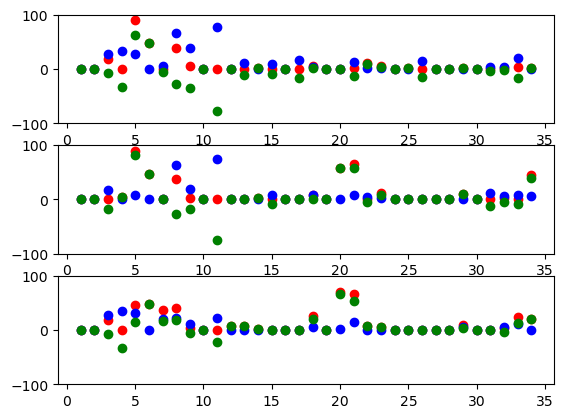

In [11]:
x = np.linspace(1,34,34)
fig, axs = plt.subplots(3,1)
axs[0].scatter(x, data['uneasy_post'], color = 'r')
axs[1].scatter(x, data['bothered_post'], color = 'r')
axs[2].scatter(x, data['uncomfortable_post'], color = 'r')
axs[0].scatter(x, data['uneasy_pre'], color = 'b')
axs[1].scatter(x, data['bothered_pre'], color = 'b')
axs[2].scatter(x, data['uncomfortable_pre'], color = 'b')
axs[0].scatter(x, uneasy_dif, color = 'g')
axs[1].scatter(x, bothered_dif, color = 'g')
axs[2].scatter(x, uncomfortable_dif, color = 'g')
for i in range(3):
    axs[i].set_ylim(-100,100)

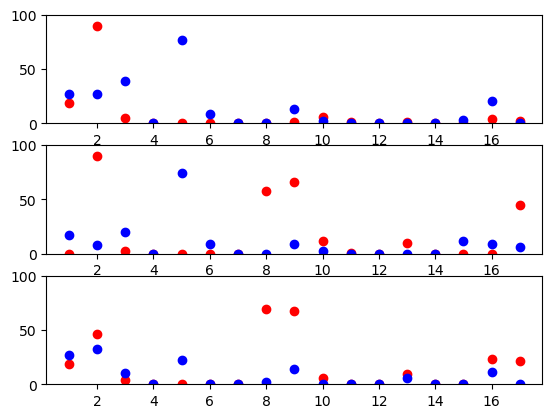

In [12]:
x_test = np.linspace(1,len(test['age']),len(test['age']))
fig_test, axs_test = plt.subplots(3,1)
axs_test[0].scatter(x_test, test['uneasy_post'], color = 'r')
axs_test[1].scatter(x_test, test['bothered_post'], color = 'r')
axs_test[2].scatter(x_test, test['uncomfortable_post'], color = 'r')
axs_test[0].scatter(x_test, test['uneasy_pre'], color = 'b')
axs_test[1].scatter(x_test, test['bothered_pre'], color = 'b')
axs_test[2].scatter(x_test, test['uncomfortable_pre'], color = 'b')
for i in range(3):
    axs_test[i].set_ylim(0,100)

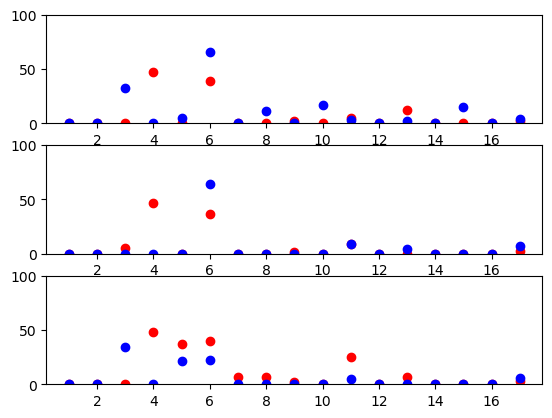

In [13]:
x_control = np.linspace(1,len(control['age']),len(control['age']))
fig_control, axs_control = plt.subplots(3,1)
axs_control[0].scatter(x_control, control['uneasy_post'], color = 'r')
axs_control[1].scatter(x_control, control['bothered_post'], color = 'r')
axs_control[2].scatter(x_control, control['uncomfortable_post'], color = 'r')
axs_control[0].scatter(x_control, control['uneasy_pre'], color = 'b')
axs_control[1].scatter(x_control, control['bothered_pre'], color = 'b')
axs_control[2].scatter(x_control, control['uncomfortable_pre'], color = 'b')
for i in range(3):
    axs_control[i].set_ylim(0,100)